# Credit Risk Analysis and Prediction

## Introduction

### What's credit risk analysis ? 



In [1]:
import pandas as pd

df = pd.read_csv("data/german.data",
                delim_whitespace=True,
                header=None
)

#Rename the columns following attribute names given in data/german.doc
columns = [
    "Status_of_existing_checking_account",
    "Duration_in_month",
    "Credit_history",
    "Purpose",
    "Credit_amount",
    "Savings_account_bonds",
    "Present_employment_since",
    "Installment_rate_in_percentage_of_disposable_income",
    "Personal_status_and_sex",
    "Other_debtors_guarantors",
    "Present_residence_since",
    "Property",
    "Age_in_years",
    "Other_installment_plans",
    "Housing",
    "Number_of_existing_credits_at_this_bank",
    "Job",
    "Number_of_people_being_liable_to_provide_maintenance_for",
    "Telephone",
    "foreign_worker",
    "Target"
]

df.columns = columns

print(df.head())
print(df.info())
print(df.describe())

  Status_of_existing_checking_account  Duration_in_month Credit_history  \
0                                 A11                  6            A34   
1                                 A12                 48            A32   
2                                 A14                 12            A34   
3                                 A11                 42            A32   
4                                 A11                 24            A33   

  Purpose  Credit_amount Savings_account_bonds Present_employment_since  \
0     A43           1169                   A65                      A75   
1     A43           5951                   A61                      A73   
2     A46           2096                   A61                      A74   
3     A42           7882                   A61                      A74   
4     A40           4870                   A61                      A73   

   Installment_rate_in_percentage_of_disposable_income  \
0                                       

In [2]:
df["Target"].value_counts()

1    700
2    300
Name: Target, dtype: int64

In [3]:
df["Target"] = df["Target"].map({1: "Good", 2: "Bad"})

In [4]:
df["Target"].value_counts()

Good    700
Bad     300
Name: Target, dtype: int64

In [5]:
print(df.isnull().sum())

Status_of_existing_checking_account                         0
Duration_in_month                                           0
Credit_history                                              0
Purpose                                                     0
Credit_amount                                               0
Savings_account_bonds                                       0
Present_employment_since                                    0
Installment_rate_in_percentage_of_disposable_income         0
Personal_status_and_sex                                     0
Other_debtors_guarantors                                    0
Present_residence_since                                     0
Property                                                    0
Age_in_years                                                0
Other_installment_plans                                     0
Housing                                                     0
Number_of_existing_credits_at_this_bank                     0
Job     

In [6]:
for col in df.columns:
    print(f"{col}: {df[col].nunique()} unique values")

Status_of_existing_checking_account: 4 unique values
Duration_in_month: 33 unique values
Credit_history: 5 unique values
Purpose: 10 unique values
Credit_amount: 921 unique values
Savings_account_bonds: 5 unique values
Present_employment_since: 5 unique values
Installment_rate_in_percentage_of_disposable_income: 4 unique values
Personal_status_and_sex: 4 unique values
Other_debtors_guarantors: 3 unique values
Present_residence_since: 4 unique values
Property: 4 unique values
Age_in_years: 53 unique values
Other_installment_plans: 3 unique values
Housing: 3 unique values
Number_of_existing_credits_at_this_bank: 4 unique values
Job: 4 unique values
Number_of_people_being_liable_to_provide_maintenance_for: 2 unique values
Telephone: 2 unique values
foreign_worker: 2 unique values
Target: 2 unique values


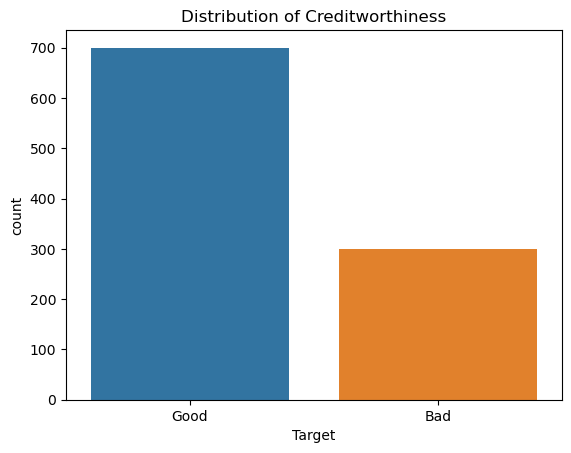

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(x="Target", data=df)
plt.title("Distribution of Creditworthiness")
plt.show()


In [8]:
categorical_cols = [
    "Status_of_existing_checking_account",
    "Credit_history",
    "Purpose",
    "Savings_account_bonds",
    "Present_employment_since",
    "Personal_status_and_sex",
    "Other_debtors_guarantors",
    "Property",
    "Other_installment_plans",
    "Housing",
    "Job",
    "Telephone",
    "foreign_worker"
]

for col in categorical_cols:
    print(f"\n{col}:\n", df[col].value_counts())



Status_of_existing_checking_account:
 A14    394
A11    274
A12    269
A13     63
Name: Status_of_existing_checking_account, dtype: int64

Credit_history:
 A32    530
A34    293
A33     88
A31     49
A30     40
Name: Credit_history, dtype: int64

Purpose:
 A43     280
A40     234
A42     181
A41     103
A49      97
A46      50
A45      22
A44      12
A410     12
A48       9
Name: Purpose, dtype: int64

Savings_account_bonds:
 A61    603
A65    183
A62    103
A63     63
A64     48
Name: Savings_account_bonds, dtype: int64

Present_employment_since:
 A73    339
A75    253
A74    174
A72    172
A71     62
Name: Present_employment_since, dtype: int64

Personal_status_and_sex:
 A93    548
A92    310
A94     92
A91     50
Name: Personal_status_and_sex, dtype: int64

Other_debtors_guarantors:
 A101    907
A103     52
A102     41
Name: Other_debtors_guarantors, dtype: int64

Property:
 A123    332
A121    282
A122    232
A124    154
Name: Property, dtype: int64

Other_installment_plans:
 A143

In [9]:
numeric_cols = [
    "Duration_in_month",
    "Credit_amount",
    "Installment_rate_in_percentage_of_disposable_income",
    "Present_residence_since",
    "Age_in_years",
    "Number_of_existing_credits_at_this_bank",
    "Number_of_people_being_liable_to_provide_maintenance_for"
]

print(df.groupby("Target")[numeric_cols].mean())


        Duration_in_month  Credit_amount  \
Target                                     
Bad             24.860000    3938.126667   
Good            19.207143    2985.457143   

        Installment_rate_in_percentage_of_disposable_income  \
Target                                                        
Bad                                              3.096667     
Good                                             2.920000     

        Present_residence_since  Age_in_years  \
Target                                          
Bad                    2.850000     33.963333   
Good                   2.842857     36.224286   

        Number_of_existing_credits_at_this_bank  \
Target                                            
Bad                                    1.366667   
Good                                   1.424286   

        Number_of_people_being_liable_to_provide_maintenance_for  
Target                                                            
Bad                               

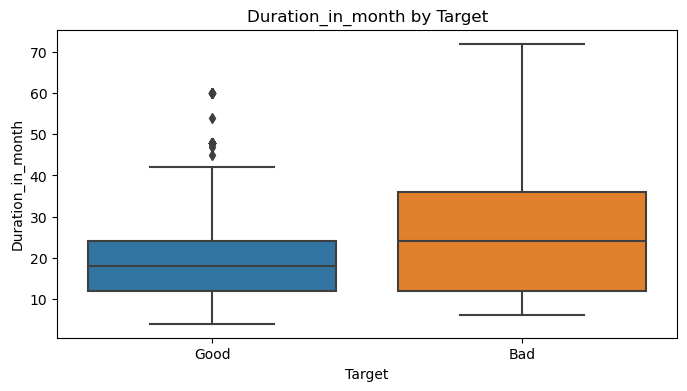

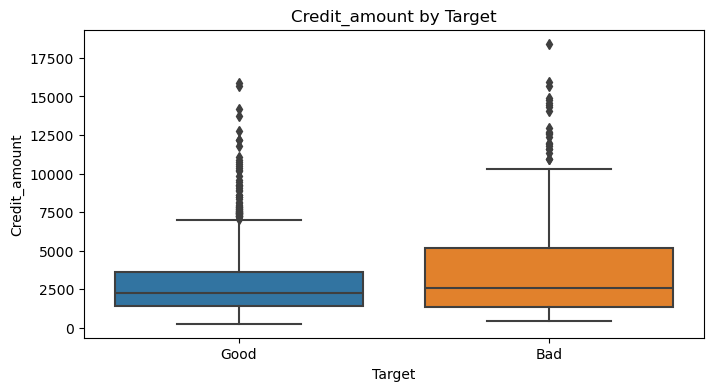

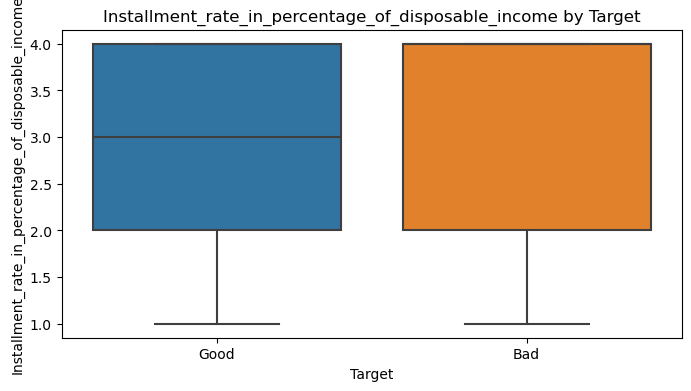

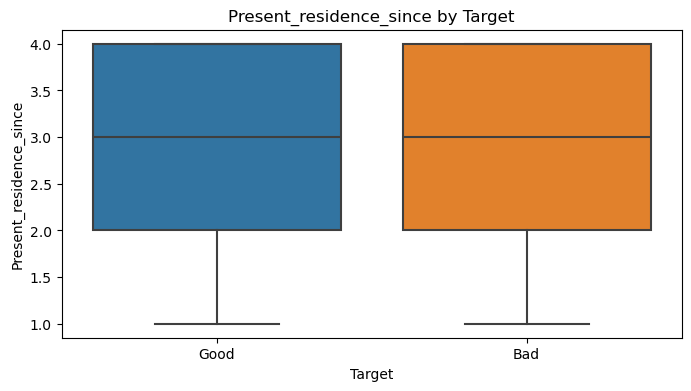

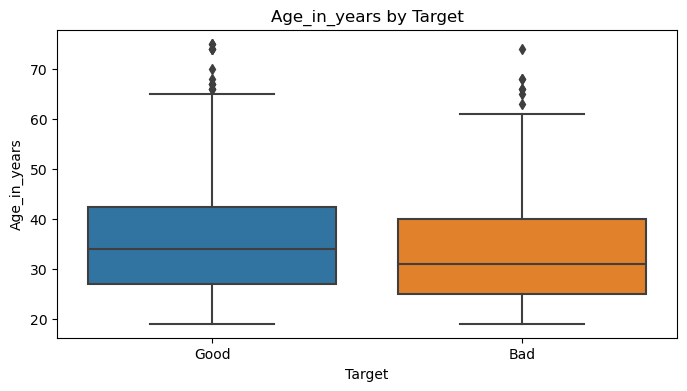

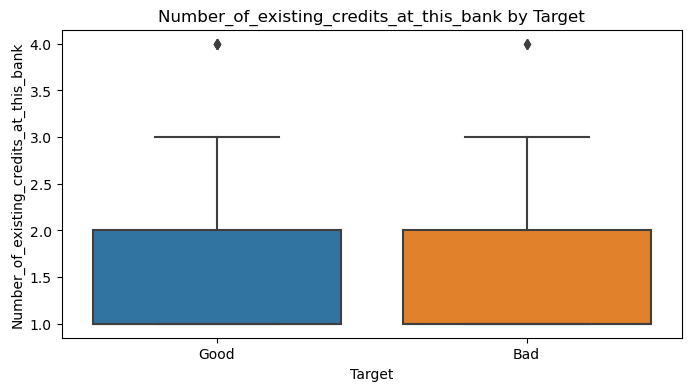

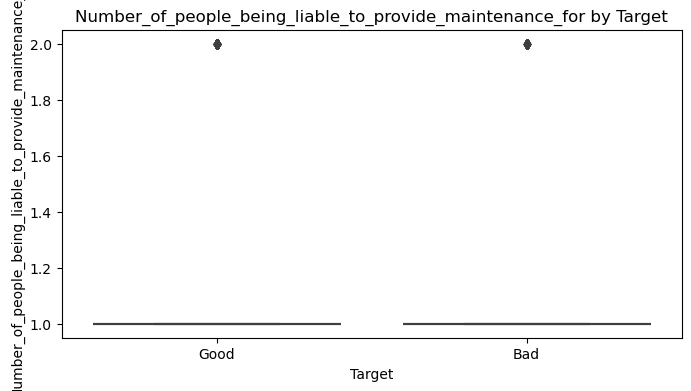

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

for col in numeric_cols:
    plt.figure(figsize=(8,4))
    sns.boxplot(x="Target", y=col, data=df)
    plt.title(f"{col} by Target")
    plt.show()


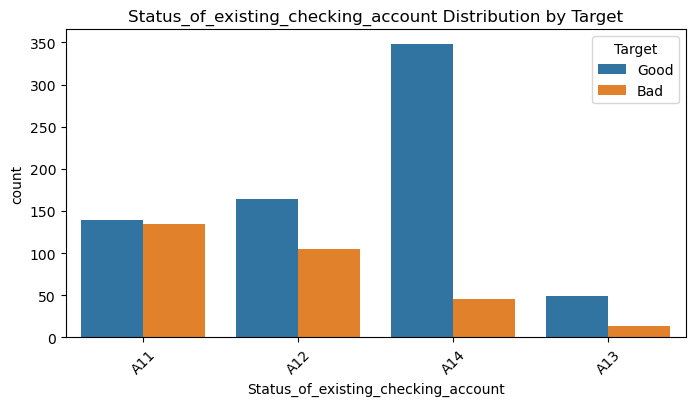

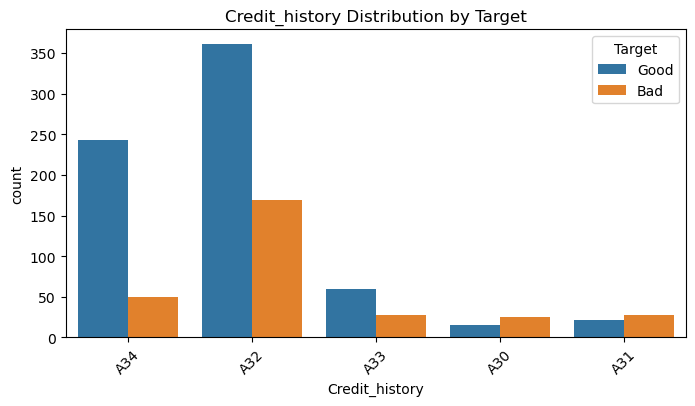

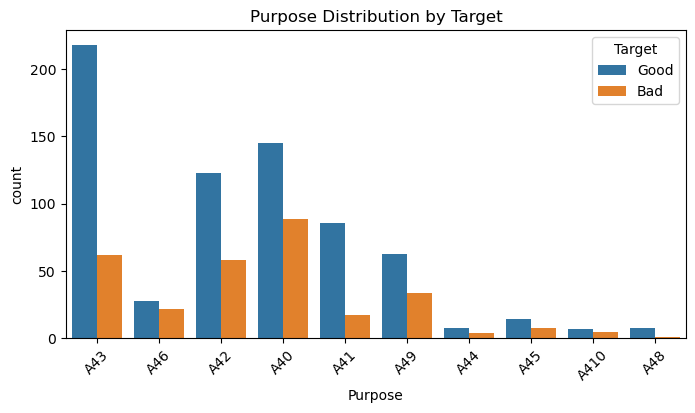

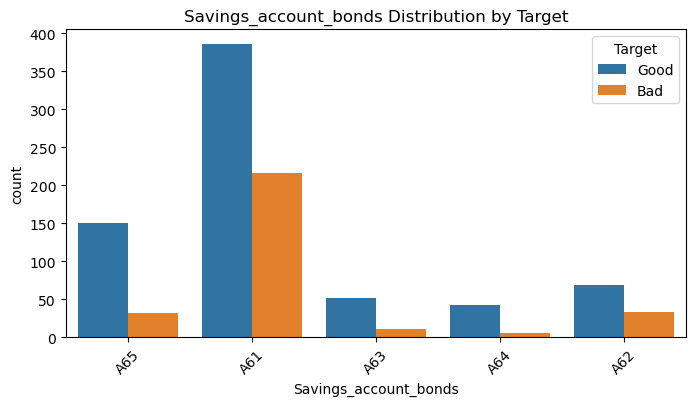

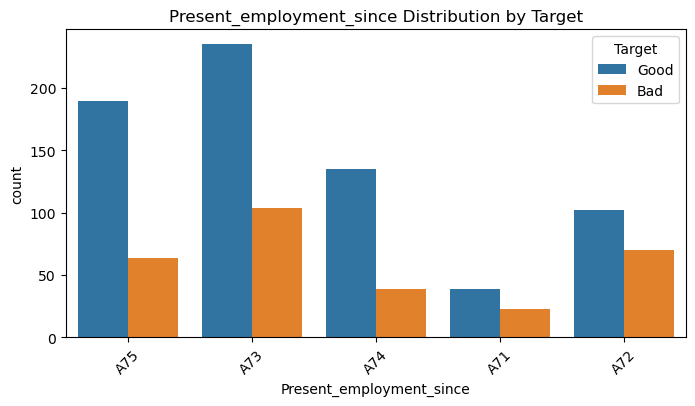

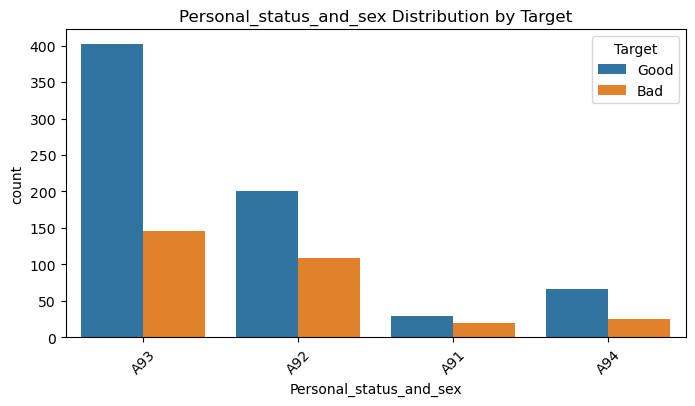

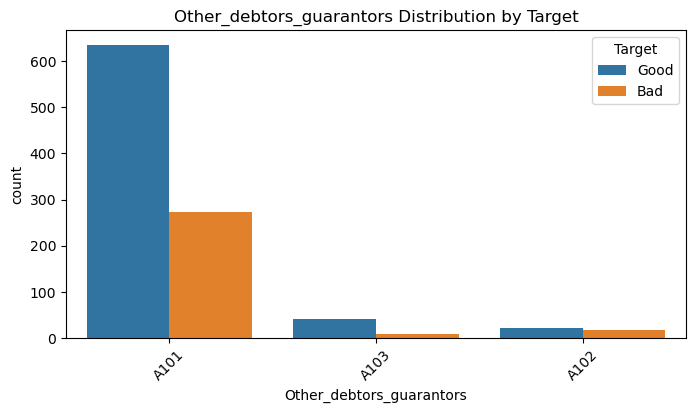

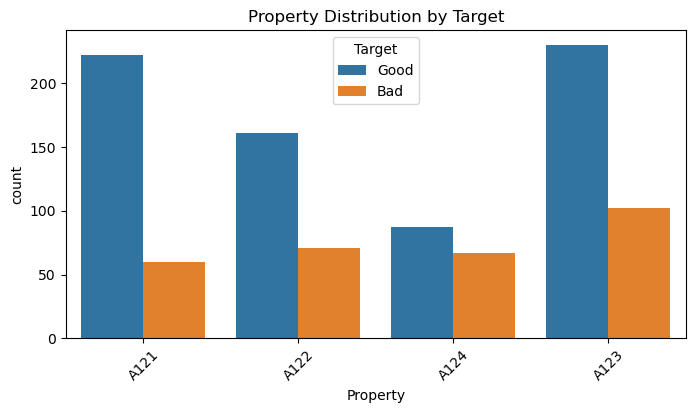

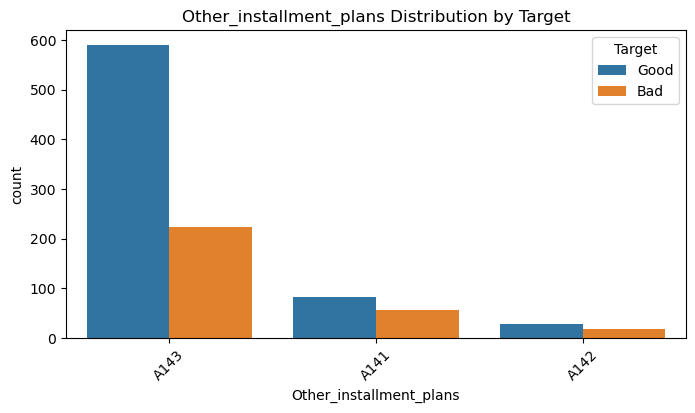

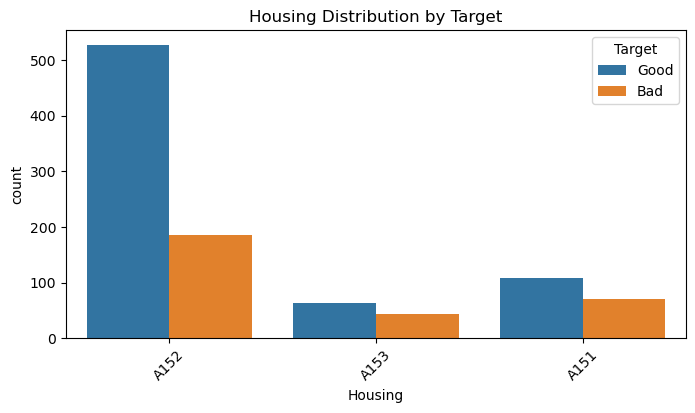

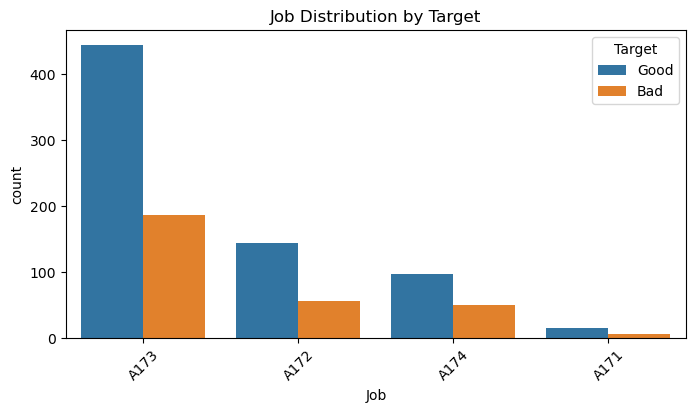

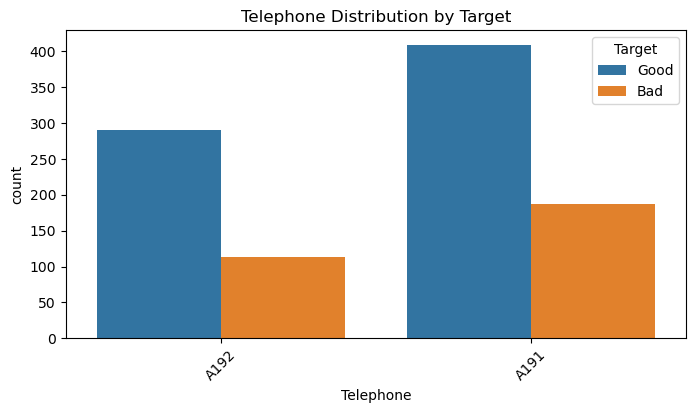

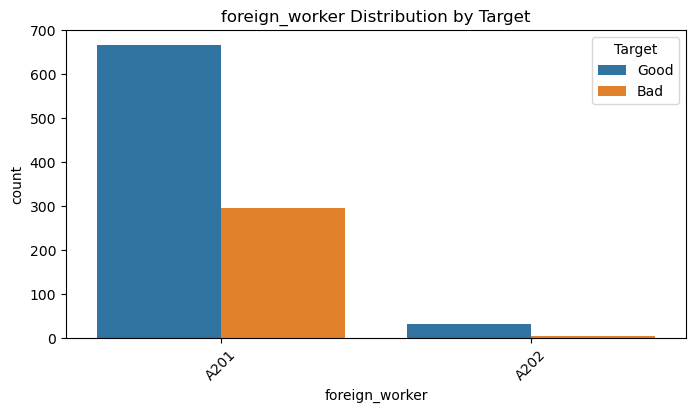

In [11]:
for col in categorical_cols:
    plt.figure(figsize=(8,4))
    sns.countplot(x=col, hue="Target", data=df)
    plt.title(f"{col} Distribution by Target")
    plt.xticks(rotation=45)
    plt.show()
